PACKAGES AND DEPENDENCIES

In [ ]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import tensorflow as tf

In [ ]:

# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
    # tf.config.experimental.set_memory_growth(gpu, True)

# Configure GPU to run without using full VRAM

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

# Import OpenCV and IMGHDR, which checks image type of input

C:\Users\Raj\AppData\Local\Temp\ipykernel_2900\2603824197.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr



Data Loading


In [5]:
data_dir = 'data'

In [6]:
os.listdir(os.path.join(data_dir, 't_shirt'))

['029032_55_basict_f1_700x700.png',
 '1-1.png',
 '10236558_11.jpg',
 '13-5.jpg',
 '1410760800_1_1_16.jpg',
 '19-2.jpg',
 '1_hero-image.jpg',
 '2-58ee7a7323cd6f2385fcaacfa1388cb9107e4ffbdb22bdb7ba9b0eedf04cd42f.jpg',
 '2_eight-top-t-shirt-design-tips.jpg',
 '3-c2852f97b1a11c0dd9a9b89c923537e890bbb3e942722a60b2777f687b629635.jpg',
 '3611220-01-2.jpg',
 '3611849-02-5.jpg',
 '3611849-13-5.jpg',
 '38189-1.jpg',
 '4000_BLACK_3.jpg',
 '41dMZQBmyZL._AC_UY1000_.jpg',
 '41uF42-1WwL._AC_UY1000_.jpg',
 '47175120250-e1.jpg',
 '51Cz5X02JqL._AC_UY1000_.jpg',
 '51ulmT3YUZL._AC_UY1000_.jpg',
 '5444528_d4e3_5.jpg',
 '711iSQbPWpL._AC_UY1000_.jpg',
 '76020_EBR.jpg',
 '911n4nIhnpL._AC_UY1000_.jpg',
 'a6divabouyfx34swkq5t79ypadvgiml9ajl08aq8rhxusdkx.png.png',
 'alized---gifts-for-dad-mom-s-gifts-papy-s-gift-grandma-s-gifts-add-my-photos.jpg',
 'All-American-Clothing-Co.----60-40-T-Shirt-TTycoon-1651086944_1200x.jpg',
 'Best-White-Shirts-New-2-Gear.jpg',
 'BG_OF_05105_Undyed_FW23_13228.jpg',
 'black-front__9

In [ ]:
# Acceptable image extensions

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
# img = cv2.imread(os.path.join(data_dir, 't_shirt', '76020_EBR.jpg'))
# img.shape

# Reads in image to numpy array
# Prints out the dimensions of the image

# plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

# Plots the image
# Plots the image after converting from OpenCV BGR scheme to RGB scheme

In [8]:
for img_class in os.listdir(data_dir):
    # button_shirt, t-shirt, pants, etc
    for img in os.listdir(os.path.join(data_dir, img_class)):
        # Every image in class directories
        img_path = os.path.join(data_dir, img_class, img)
        # Individual image path
        
        try:
            img = cv2.imread(img_path)
            # Open up an image
            tip = imghdr.what(img_path)
            # Image extension
            if tip not in image_exts:
                print("Image not in the extension list {}".format(img_path))
                os.remove(img_path)

                # If image format doesn't exist in the extension list, 
                # remove the image and it's path
        
        except Exception as e:
            print('Issue with image {}'.format(img_path))
            # os.remove(img_path)

In [9]:
import numpy as np

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 32)

# Load images onto data

Found 851 files belonging to 6 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

# Instantiates numpy iterator that will sequentially batch data

In [13]:
batch = data_iterator.next()

    # Get batch from iterator

In [15]:
batch[0].shape

# Images represented as numpy arrays

(32, 256, 256, 3)

In [ ]:
batch[1]

# Prints each image batch represented as [0,14] to correspond to the correct class

array([0, 0, 3, 3, 2, 4, 5, 4, 0, 0, 0, 3, 5, 5, 4, 1, 0, 1, 2, 3, 0, 4,
       0, 3, 2, 0, 5, 5, 0, 1, 0, 2])

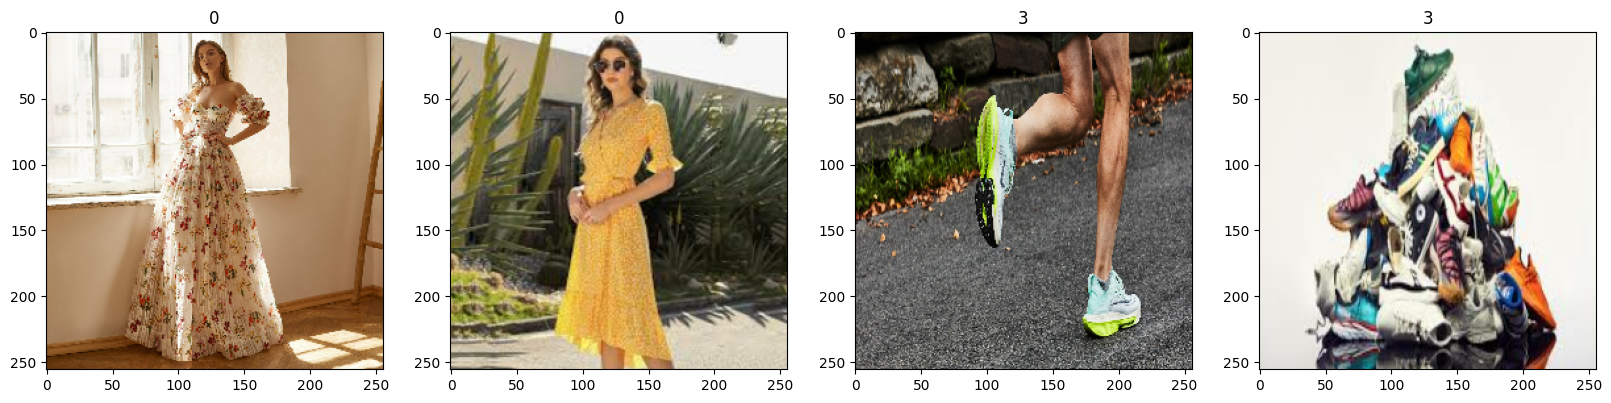

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# Print four images from the batch

In [18]:
data = data.map(lambda x,y: (x/255, y))

# .map applies formatting to all images in pipeline, performs transformation on x variable (division)
# x represents images
# y represents target variables (classes)

In [ ]:
data.as_numpy_iterator().next()[0]

# IF values look off (i.e not in range [0,1]), you probably ran the division function twice
# Reload the data, grab another batch, plot, normalize, then run this code again

array([[[[0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         ...,
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]],

        [[0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         ...,
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]],

        [[0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         ...,
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]],

        ...,

        [[0.9490196 , 0.9490196 , 0.9490196 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]

In [20]:
print(len(data))

27


In [21]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [22]:
train_size + val_size + test_size

# train = 52 batches * 32 images / batch = 1664 images
# val = 16 batches * 32 images / batch = 512 images
# test = 7 batches * 32 images / batch = 224 images

26

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# .take allocates the batch size into respective set
# .take skips the previous and takes the remaining batches of the partition

TRAINING

In [24]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# 1 denotes stride size for Convolution
# Default maxpooling is a (2,2) grid size

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

# Establishes the 4 layer CNN model
# 4 Convolutional layers with 3x3 grid size
# 4 MaxPooling layers
# 1 Dropout layer
# 2 Dense layers

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665,158 (25.43 MB)

 Trainable params: 6,665,158 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665,158 (25.43 MB)

 Trainable params: 6,665,158 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

# Creates space to place log model training for future performance

In [30]:
history = model.fit(train, epochs = 15, validation_data = val, callbacks = [tensorboard_callback])

# Add steps_per_epoch and val_steps for fitting (i.e. how many iterations are needed for one epoch to be completed)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 616ms/step - accuracy: 0.1875 - loss: 1.9130 - val_accuracy: 0.2292 - val_loss: 1.7735
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 600ms/step - accuracy: 0.2872 - loss: 1.7463 - val_accuracy: 0.2760 - val_loss: 1.6794
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 598ms/step - accuracy: 0.3738 - loss: 1.5935 - val_accuracy: 0.4792 - val_loss: 1.4374
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.4481 - loss: 1.4221 - val_accuracy: 0.5625 - val_loss: 1.3104
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 592ms/step - accuracy: 0.6106 - loss: 1.0649 - val_accuracy: 0.6406 - val_loss: 1.0685
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step - accuracy: 0.7036 - loss: 0.8324 - val_accuracy: 0.6823 - val_loss: 0.8950
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 594ms/step - accuracy: 0.7526 - loss: 0.7468 - val_accuracy: 0.7500 - val_loss: 0.8813
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.8249 - loss: 0.4914 - val_accu

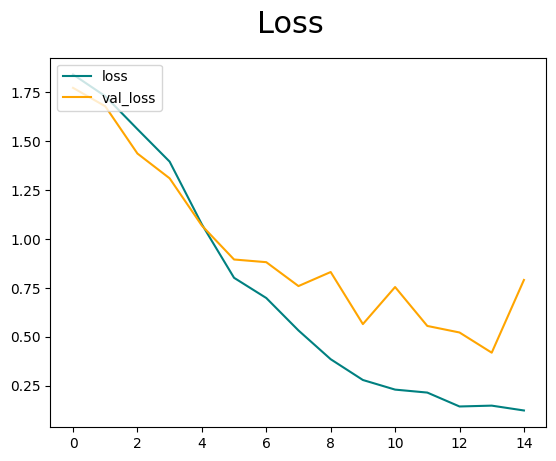

In [31]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()

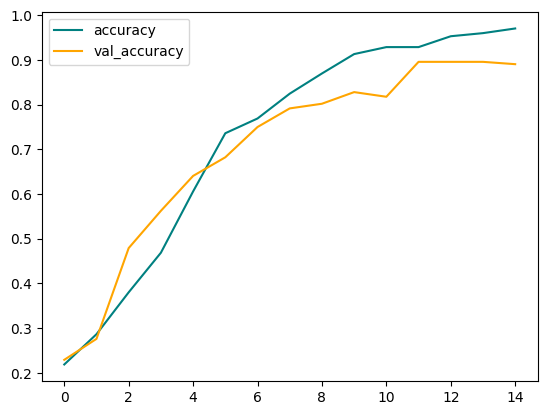

In [32]:
##### fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [35]:
len(test)

2

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    #precision.update_state(y, yhat)
    ##recall.update_state(y, yhat)
    ##acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


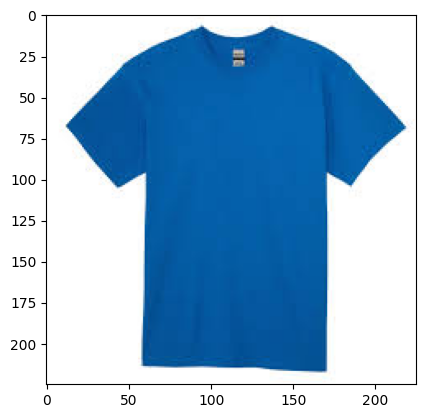

In [48]:
img = cv2.imread("download.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

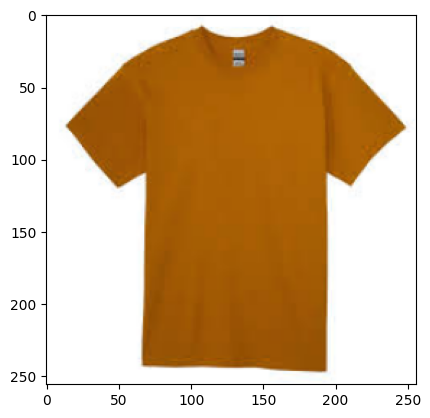

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
resize.shape

TensorShape([256, 256, 3])

In [40]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [42]:
yhat

array([[6.6206600e-09, 4.7178823e-04, 1.1117983e-06, 6.7412659e-10,
        4.9753640e-10, 9.9952710e-01]], dtype=float32)

In [50]:
import tensorflow.keras.models
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('model', 'clothingclassifierbeta_v2.keras'))

#Serialization function

In [52]:
new_model = load_model(os.path.join('model', 'clothingclassifierbeta_v2.keras'))

In [53]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[6.6206600e-09, 4.7178823e-04, 1.1117983e-06, 6.7412659e-10,
        4.9753640e-10, 9.9952710e-01]], dtype=float32)